In [1]:
#importando a base de dados

import pandas as pd

url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(url)

dados.head(5)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [2]:
dados.describe(include="all")

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
count,6574,9996,10008,10008.000000,10008.000000,10008.000000,10008.000000,10008
unique,3130,701,1,NaN,NaN,NaN,NaN,1041
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000
freq,24,409,10008,NaN,NaN,NaN,NaN,182
mean,NaN,NaN,NaN,442.300659,3.483114,3.879097,4.097222,NaN
std,NaN,NaN,NaN,7515.379389,1.064200,1.988467,2.824014,NaN
min,NaN,NaN,NaN,10.000000,1.000000,1.000000,1.000000,NaN
25%,NaN,NaN,NaN,173.000000,3.000000,2.000000,2.000000,NaN
50%,NaN,NaN,NaN,290.000000,3.000000,4.000000,4.000000,NaN
75%,NaN,NaN,NaN,460.250000,4.000000,5.000000,5.000000,NaN


# PRÉ TAREFA: Arrumando a base

In [3]:
# Passo 1: convertendo a coluna "Valor" em float
dados[["Moeda","Valor_split","Modalidade"]] = dados["Valor"].str.split(expand=True)

dados_no_dots = dados["Valor_split"].str.replace(".","")

dados["Valor_float"] = dados_no_dots.astype(float)

# Passo 2: deixando apenas os valores referentes a venda de imoveis
dados_venda_masc = dados["Modalidade"].isnull()

dados_venda = dados[dados_venda_masc]

dados_venda["Modalidade"].unique()

C:\Users\felma\AppData\Local\Temp\ipykernel_8448\2716159872.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_no_dots = dados["Valor_split"].str.replace(".","")


array([None], dtype=object)

# TAREFA 1: Deixar o gráfico do histograma de valores mais legível (alterar labels, cores, titulo e escala).

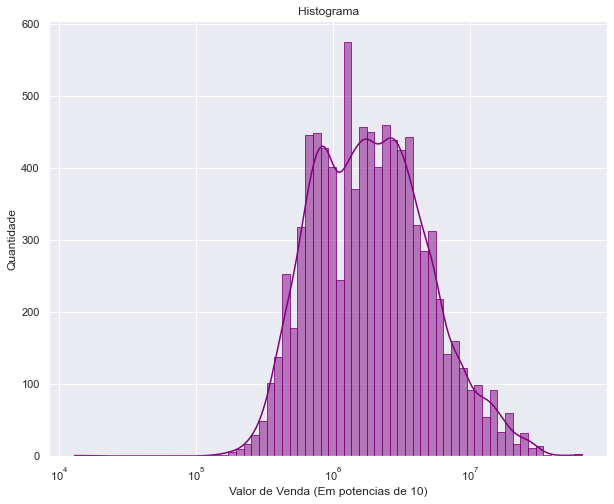

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10,8))
histograma = sns.histplot(data=dados_venda, x="Valor_float", kde=True, log_scale=True, color="purple", ec="purple")
histograma.set_title("Histograma")
histograma.set_xlabel("Valor de Venda (Em potencias de 10)")
histograma.set_ylabel("Quantidade")
plt.show()

# TAREFA 2: Preço do metro quadrado por bairro e plotar em um gráfico ideal.

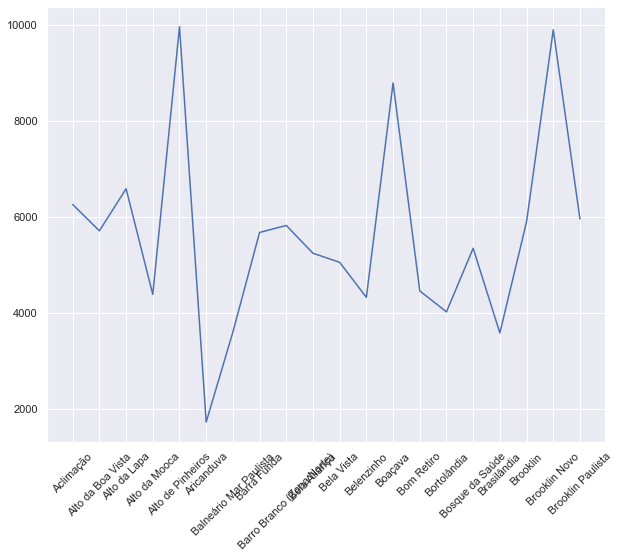

In [20]:
metragem_media_bairros = dados.groupby(["Bairro"])["Metragem"].mean()

valor_medio_bairros = dados.groupby(["Bairro"])["Valor_float"].mean()

valor_por_m2 = valor_medio_bairros/metragem_media_bairros


sns.set()
plt.figure(figsize=(10,8))
plt.plot(valor_por_m2.head(10).index, valor_por_m2.head(10).values)
plt.xticks(rotation = 45)
plt.show()